Notebook with processed data for Final Size Scailing (FSS).

In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reads and saves the data
D8 = np.loadtxt("./Data/Data8.txt", dtype=float)
D10 = np.loadtxt("./Data/Data10.txt", dtype=float)
D12 = np.loadtxt("./Data/Data12.txt", dtype=float)
D14 = np.loadtxt("./Data/Data14.txt", dtype=float)
D16 = np.loadtxt("./Data/Data16.txt", dtype=float)

Variables are saved as follow:

0 --> $\beta$

1 --> $\langle M \rangle$

2 --> $\langle M^2 \rangle$

3 --> $\langle M^4 \rangle$

4 --> $\langle E \rangle$

5 --> $\langle E^2 \rangle$

6 --> $\langle P \rangle$ :  Mean cluster size

7 --> $\chi$

8 --> $C_V$

9 --> $U$

# Energy

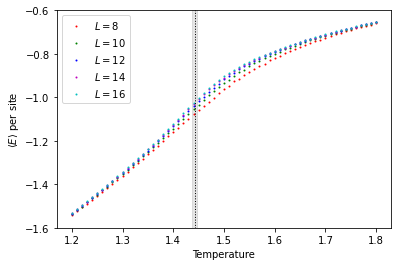

In [332]:
plt.plot(T,D8[:,4]/8**3,"ro",
         T,D10[:,4]/10**3,"go",
         T,D12[:,4]/12**3,"bo",
         T,D14[:,4]/14**3,"mo",
         T,D16[:,4]/16**3,"co",markersize=1)
plt.ylabel(r'$\langle E \rangle$ per site')
plt.xlabel('Temperature')
plt.legend([r'$L=$8',r"$L=$10",r"$L=$12",r"$L=$14",r"$L=$16"])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [-1.6,-1.6],alpha=0.1,color="k")
plt.ylim(-1.6,-.6)
plt.savefig('./Figures/EnergyPerSite.png', dpi=200, bbox_inches='tight')

# Critical Temperature

In [5]:
T = 1/D8[:,0]

In [6]:
#Leats square polynomial fit of order 3 for points around the critical point
U8 = np.polyfit(T[18:29], D8[18:29,9], 3)
p8 = np.poly1d(U8)
U10 = np.polyfit(T[18:29], D10[18:29,9], 3)
p10 = np.poly1d(U10)
U12 = np.polyfit(T[18:29], D12[18:29,9], 3)
p12 = np.poly1d(U12)
U14 = np.polyfit(T[18:29], D14[18:29,9], 3)
p14 = np.poly1d(U14)
U16 = np.polyfit(T[18:29], D16[18:29,9], 3)
p16 = np.poly1d(U16)
xp = np.linspace(1.4, 1.48, 500)

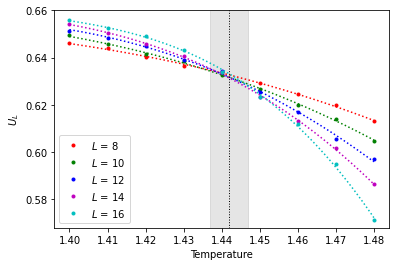

In [7]:
#Experimental points + fit + Critical point (found bellow)
plt.plot(T[20:29],D8[20:29,9] ,"ro", xp, p8(xp),"r:",
         T[20:29],D10[20:29,9],"go", xp, p10(xp),"g:",
         T[20:29],D12[20:29,9],"bo", xp, p12(xp),"b:",
         T[20:29],D14[20:29,9],"mo", xp, p14(xp),"m:",
         T[20:29],D16[20:29,9],"co", xp, p16(xp),"c:",markersize=3)
plt.ylabel(r'$U_L$')
plt.xlabel('Temperature')
plt.legend([r'$L$ = 8', '_nolegend_',r"$L$ = 10",'_nolegend_',
            r"$L$ = 12",'_nolegend_',r"$L$ = 14",'_nolegend_',
            r"$L$ = 16" ] , loc='lower left')
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [0.66,0.66],alpha=0.1,color="k")
plt.ylim(0.568,.66)
plt.savefig('./Figures/Ubinder.png', dpi=200, bbox_inches='tight');

In [54]:
#Search for the critical temperature
lines = [p8,p10,p12,p14,p16]
TC = []  #Intersection tempetures
idx = [] #Intersection indexes 
for i in range(5):
    for j in range(i+1,5):
        TC.append(xp[np.argwhere(np.diff(np.sign(lines[j](xp) - lines[i](xp))).flatten())[0][0]])
TC_T = 1/0.6929
print("Critical Temperature:\t",np.mean(TC),
      "\nUncertainty:\t\t",np.std(TC),
     "\nError:\t\t\t",(TC_T-np.mean(TC)+np.std(TC))/TC_T*100)
xp[262]  #Critical Temperature

Critical Temperature:	 1.442004008016032 
Uncertainty:		 0.0046354572488339985 
Error:			 0.4047331173408629


1.4420040080160321

# $1/\nu$

In [9]:
#Lattice lengths
lengths = np.array([8, 10, 12, 14, 16])
#Critical temperature index in xp
DataU = [D8[:,9],D10[:,9],D12[:,9],D14[:,9],D16[:,9]]

In [10]:
#Derivative of curves by central differences
a = 100
dU = []
Inv_dT = 1/(T[25]-T[23])
for i in range(5):
    dU.append((DataU[i][23]-DataU[i][25])*Inv_dT)

In [11]:
#Log-Log fit
Log_dU = np.array(np.log(dU))
Log_lengths = sm.add_constant(np.log(lengths))
model = sm.OLS(Log_dU,Log_lengths)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sun, 04 Dec 2022   Prob (F-statistic):            0.00125
Time:                        22:42:48   Log-Likelihood:                 7.9174
No. Observations:                   5   AIC:                            -11.83
Df Residuals:                       3   BIC:                            -12.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8671      0.289    -13.383      0.001      -4.787      -2.948
x1             1.4038      0.117     11.990      0.001       1.031       1.776
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.783
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.538
Skew:                           0.694   Prob(JB):                        0.764
Kurtosis:                       2.187   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

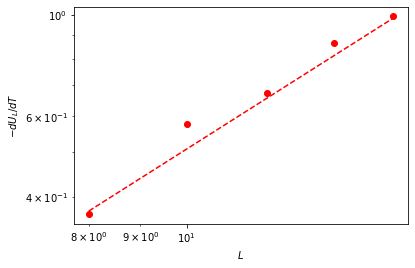

In [433]:
plt.plot(lengths,dU,"ro",lengths,np.exp(-3.9)*np.power(lengths,1.4),"r--")
plt.ylabel(r'$-dU_L/dT$')
plt.xlabel(r'$L$')
plt.yscale('log')
plt.xscale('log')
plt.savefig('./Figures/dU.png', dpi=200, bbox_inches='tight')

$\nu = 0.72 \pm 0.05$ $\textbf{vs}$ $0.71$

$\epsilon_\% = 8.5\%$

# $\beta/\nu$

In [400]:
#Magnetization per site
MpS8  = D8[: ,1]/ 8**3
MpS10 = D10[:,1]/10**3
MpS12 = D12[:,1]/12**3
MpS14 = D14[:,1]/14**3
MpS16 = D16[:,1]/16**3

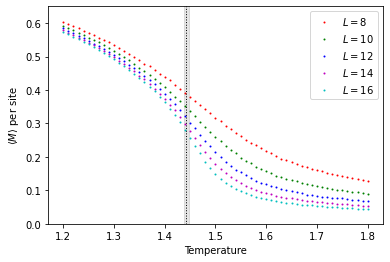

In [322]:
#Plot
plt.plot(T,MpS8,"ro",
         T,MpS10,"go",
         T,MpS12,"bo",
         T,MpS14,"mo",
         T,MpS16,"co",markersize=1)
plt.ylabel(r'$\langle M \rangle$ per site')
plt.xlabel('Temperature')
plt.legend([r'$L=$8',r"$L=$10",r"$L=$12",r"$L=$14",r"$L=$16"])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [10,10],alpha=0.1,color="k")
plt.ylim(0,.65)
plt.savefig('./Figures/MagPerSite.png', dpi=200, bbox_inches='tight')

In [77]:
#Leats square polynomial fit of order 2 for points around the critical point
pM8 = np.poly1d(np.polyfit(T[20:29], MpS8[20:29], 2))
pM10 = np.poly1d(np.polyfit(T[20:29], MpS10[20:29], 2))
pM12 = np.poly1d(np.polyfit(T[20:29], MpS12[20:29], 2))
pM14 = np.poly1d(np.polyfit(T[20:29], MpS14[20:29], 2))
pM16 = np.poly1d(np.polyfit(T[20:29], MpS16[20:29], 2))

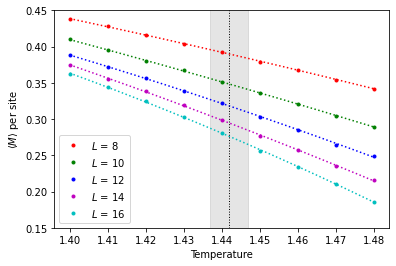

In [82]:
#Plot (Zoom)
plt.plot(T[20:29],MpS8[20:29], "ro", xp,pM8(xp), "r:",
         T[20:29],MpS10[20:29],"go", xp,pM10(xp),"g:",
         T[20:29],MpS12[20:29],"bo", xp,pM12(xp),"b:",
         T[20:29],MpS14[20:29],"mo", xp,pM14(xp),"m:",
         T[20:29],MpS16[20:29],"co", xp,pM16(xp),"c:",markersize=3)
plt.ylabel(r'$\langle M \rangle$ per site')
plt.xlabel('Temperature')
plt.legend([r'$L$ = 8', '_nolegend_',r"$L$ = 10",'_nolegend_',
            r"$L$ = 12",'_nolegend_',r"$L$ = 14",'_nolegend_',
            r"$L$ = 16" ])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [10,10],alpha=0.1,color="k")
plt.ylim(0.15,.45)
plt.savefig('./Figures/MagPerSiteZoom.png', dpi=200, bbox_inches='tight')

In [83]:
Mmax = [pM8(xp[262]),pM10(xp[262]),pM12(xp[262]),pM14(xp[262]),pM16(xp[262])]

In [84]:
Log_Mmax = np.array(np.log(Mmax))
modelMpS = sm.OLS(Log_Mmax,Log_lengths)
resultMpS = modelMpS.fit()
resultMpS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.817e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.24e-07
Time:                        23:21:49   Log-Likelihood:                 28.503
No. Observations:                   5   AIC:                            -53.01
Df Residuals:                       3   BIC:                            -53.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0927      0.005     19.687      0.000       0.078       0.108
x1            -0.4981      0.002   -261.087      0.000      -0.504      -0.492
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.794
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.693
Skew:                           0.429   Prob(JB):                        0.707
Kurtosis:                       1.391   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

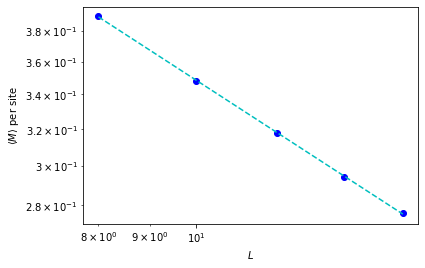

In [86]:
plt.plot(lengths,Mmax,"bo",lengths,np.exp(0.0927)*np.power(lengths,-0.4981),"c--")
plt.ylabel(r'$\langle M \rangle$ per site')
plt.xlabel(r'$L$')
plt.yscale('log')
plt.xscale('log')
plt.savefig('./Figures/M.png', dpi=200, bbox_inches='tight')

$\beta/\nu = 0.498 \pm 0.002$  $\textbf{vs}$ $0.514$

$\epsilon_\% = 3.5\%$

## Linear relation for $C_V$

In [95]:
# Define the Gaussian function
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

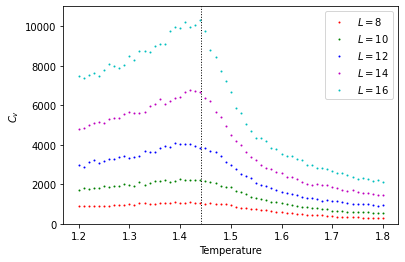

In [93]:
#Heat Capacity
plt.plot(T,D8[:,8],"ro",
         T,D10[:,8],"go",
         T,D12[:,8],"bo",
         T,D14[:,8],"mo",
         T,D16[:,8],"co",markersize=1)
plt.ylabel(r'$C_v$')
plt.xlabel('Temperature')
plt.legend([r'$L=$8',r"$L=$10",r"$L=$12",r"$L=$14",r"$L=$16"])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [10,10],alpha=0.1,color="k")
plt.ylim(0,11000)
#plt.xlim(2.2,2.7)
plt.savefig('./Figures/Cv.png', dpi=200, bbox_inches='tight')

In [187]:
TCv_max = np.zeros(5)

### L = 8

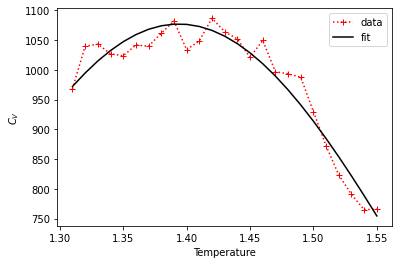

1.3938239411522857 $\pm$ 0.0037668360459495414


In [188]:
#Finds the maximum of the curve via Gaussian Fit
x = np.asarray(T[11:36])
y = np.asarray(D8[11:36,8])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.4,.1])
  
plt.plot(x,y,'r+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
TCv_max[0] = popt[1]

### L = 10

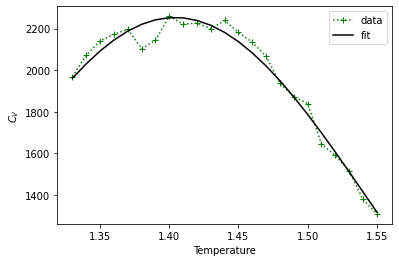

1.404171378702342 $\pm$ 0.0023438960435221757


In [189]:
x = np.asarray(T[13:36])
y = np.asarray(D10[13:36,8])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.4,.1])
  
plt.plot(x,y,'g+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
TCv_max[1] = popt[1]

### L = 12

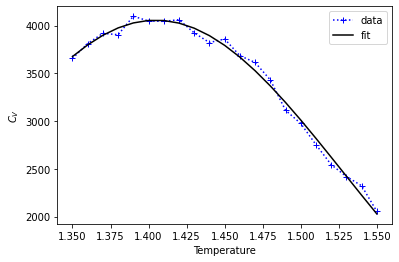

1.4047820867675316 $\pm$ 0.001772083595037419


In [190]:
x = np.asarray(T[15:36])
y = np.asarray(D12[15:36,8])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.4,.1])
  
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
TCv_max[2] = popt[1]

### L = 14

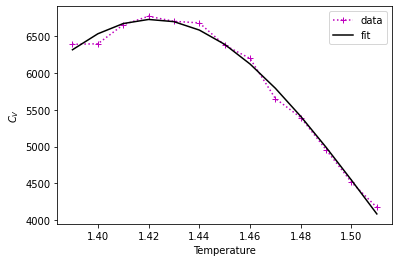

1.421516992150255 $\pm$ 0.001571999770929388


In [191]:
x = np.asarray(T[19:32])
y = np.asarray(D14[19:32,8])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.4,.1])
  
plt.plot(x,y,'m+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
TCv_max[3] = popt[1]

### L = 16

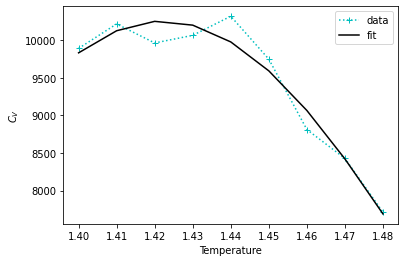

1.4221293424298571 $\pm$ 0.0033182880975455584


In [192]:
x = np.asarray(T[20:29])
y = np.asarray(D16[20:29,8])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.4,.1])
  
plt.plot(x,y,'c+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
TCv_max[4] = popt[1]

## Linear relation for $\chi$

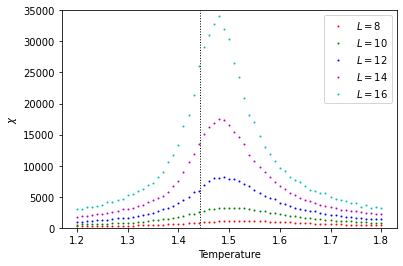

In [265]:
#Suceptibility
plt.plot(T,D8[:,7],"ro",
         T,D10[:,7],"go",
         T,D12[:,7],"bo",
         T,D14[:,7],"mo",
         T,D16[:,7],"co",markersize=1)
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.legend([r'$L=$8',r"$L=$10",r"$L=$12",r"$L=$14",r"$L=$16"])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [10,10],alpha=0.1,color="k")
plt.ylim(0,35000)
plt.savefig('./Figures/Cchi.png', dpi=200, bbox_inches='tight')

In [252]:
Tχ_max = np.zeros(5)
χ_max  = np.zeros(5)

### L = 8

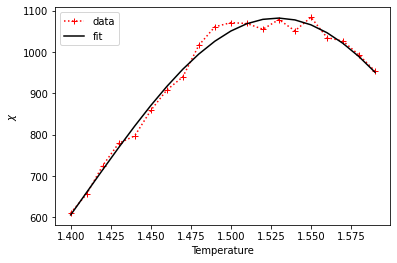

1.5290790838637367 $\pm$ 0.0016743300699488789
1082.0283191209032


In [253]:
x = np.asarray(T[20:40])
y = np.asarray(D8[20:40,7])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.4,.1])
  
plt.plot(x,y,'r+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))
Tχ_max[0] = popt[1]
χ_max[0]  =  gauss(popt[1],*popt)

### L = 10

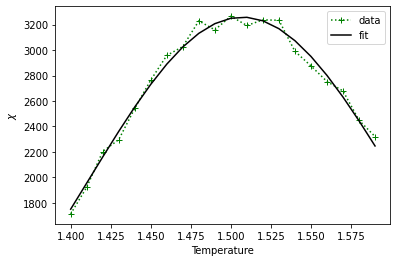

1.5071342971752468 $\pm$ 0.0009188407332494296
3259.073438555007


In [254]:
x = np.asarray(T[20:40])
y = np.asarray(D10[20:40,7])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.4,.1])
  
plt.plot(x,y,'g+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))
Tχ_max[1] = popt[1]
χ_max[1]  =  gauss(popt[1],*popt)

### L = 12

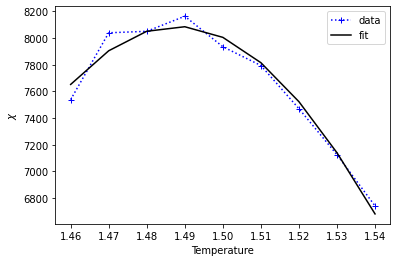

1.487984498291766 $\pm$ 0.0015666838094609498
8087.3448530366195


In [255]:
x = np.asarray(T[26:35])
y = np.asarray(D12[26:35,7])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.47,.1])
  
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))
Tχ_max[2] = popt[1]
χ_max[2]  =  gauss(popt[1],*popt)

### L = 14

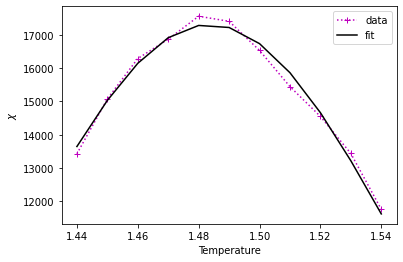

1.4835842529429655 $\pm$ 0.0007110325896353529
17312.117447106455


In [256]:
x = np.asarray(T[24:35])
y = np.asarray(D14[24:35,7])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.47,.1])
  
plt.plot(x,y,'m+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))
Tχ_max[3] = popt[1]
χ_max[3]  =  gauss(popt[1],*popt)

### L = 16

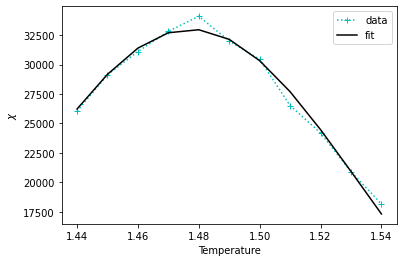

1.4773708580817222 $\pm$ 0.0009590358674156314
33002.59074550469


In [314]:
x = np.asarray(T[24:35])
y = np.asarray(D16[24:35,7])

popt,pcov = curve_fit(gauss,x,y,p0=[1,1.47,.1])
  
plt.plot(x,y,'c+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.savefig('./Figures/Gauss.png', dpi=200, bbox_inches='tight')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))
Tχ_max[4] = popt[1]
χ_max[4]  =  gauss(popt[1],*popt)

In [282]:
Lv = 1./np.power(lengths,0.72)
Length_v = sm.add_constant(1./np.power(lengths,0.72))

In [283]:
modelCv = sm.OLS(TCv_max,Length_v)
resultCv = modelCv.fit()
resultCv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     25.07
Date:                Mon, 05 Dec 2022   Prob (F-statistic):             0.0153
Time:                        00:55:39   Log-Likelihood:                 21.065
No. Observations:                   5   AIC:                            -38.13
Df Residuals:                       3   BIC:                            -38.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4669      0.012    125.432      0.000       1.430       1.504
x1            -0.3325      0.066     -5.007      0.015      -0.544      -0.121
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.907
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.664
Skew:                          -0.881   Prob(JB):                        0.717
Kurtosis:                       2.708   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
modelχ = sm.OLS(Tχ_max,Length_v)
resultχ = modelχ.fit()
resultχ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     129.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):            0.00145
Time:                        00:55:39   Log-Likelihood:                 22.235
No. Observations:                   5   AIC:                            -40.47
Df Residuals:                       3   BIC:                            -41.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3932      0.009    150.534      0.000       1.364       1.423
x1             0.5987      0.053     11.394      0.001       0.432       0.766
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.786
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.945
Skew:                          -1.053   Prob(JB):                        0.623
Kurtosis:                       2.679   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

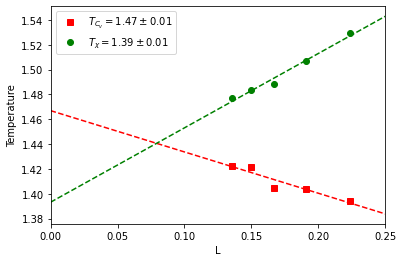

In [288]:
plt.plot(Lv,TCv_max,"rs",
         np.linspace(0, .25, num=5),np.linspace(0, .25, num=5)*-0.3325+1.4669,"r--",
         Lv,Tχ_max,"go",
         np.linspace(0, .25, num=5),np.linspace(0, .25, num=5)*0.5987+1.3932,"g--",)
plt.ylabel('Temperature')
plt.xlabel('L')
plt.legend([r'$T_{C_v} = 1.47\pm0.01$','_nolegend_',
            r"$T_{\chi} = 1.39\pm0.01$",'_nolegend_'])
plt.xlim(0,.25)
plt.savefig('./Figures/chiCv.png', dpi=200, bbox_inches='tight')

# Mean Cluster Size

In [302]:
T[:]

array([1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 ,
       1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41,
       1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
       1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63,
       1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74,
       1.75, 1.76, 1.77, 1.78, 1.79, 1.8 ])

In [305]:
χbar8 = D8[:,7] * T[:]
χbar10 = D10[:,7] * T[:]
χbar12 = D12[:,7] * T[:]
χbar14 = D14[:,7] * T[:]
χbar16 = D16[:,7] * T[:]

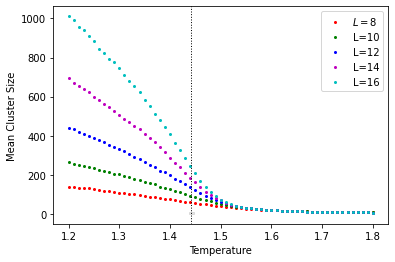

In [313]:
plt.plot(T,D8[:,6],"ro",
         T,D10[:,6],"go",
         T,D12[:,6],"bo",
         T,D14[:,6],"mo",
         T,D16[:,6],"co",markersize = 2)
plt.ylabel('Mean Cluster Size')
plt.xlabel('Temperature')
plt.legend([r'$L=8$',r"L=10",r"L=12",r"L=14",r"L=16"])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [10,10],alpha=0.1,color="k")
plt.savefig('./Figures/MCS.png', dpi=200, bbox_inches='tight')

# $\gamma/\nu$

### $M^2$

In [315]:
#Magnetization square per site
M2pS8  = D8[: ,2]/ 8**3
M2pS10 = D10[:,2]/10**3
M2pS12 = D12[:,2]/12**3
M2pS14 = D14[:,2]/14**3
M2pS16 = D16[:,2]/16**3

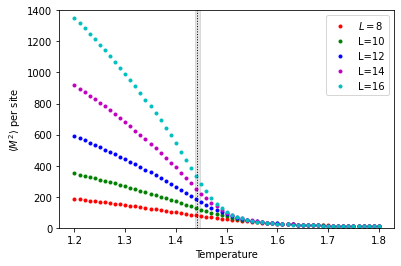

In [339]:
plt.plot(T,M2pS8,"ro",
         T,M2pS10,"go",
         T,M2pS12,"bo",
         T,M2pS14,"mo",
         T,M2pS16,"co",markersize=3)
plt.ylabel(r'$\langle M^2 \rangle$ per site')
plt.xlabel('Temperature')
plt.legend([r'$L=8$',r"L=10",r"L=12",r"L=14",r"L=16"])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [1400,1400],alpha=0.1,color="k")
plt.ylim(0,1400)
plt.savefig('./Figures/M2.png', dpi=200, bbox_inches='tight')

In [340]:
#Leats square polynomial fit of order 2 for points around the critical point
pM28 = np.poly1d(np.polyfit(T[20:29], M2pS8[20:29], 2))
pM210 = np.poly1d(np.polyfit(T[20:29], M2pS10[20:29], 2))
pM212 = np.poly1d(np.polyfit(T[20:29], M2pS12[20:29], 2))
pM214 = np.poly1d(np.polyfit(T[20:29], M2pS14[20:29], 2))
pM216 = np.poly1d(np.polyfit(T[20:29], M2pS16[20:29], 2))

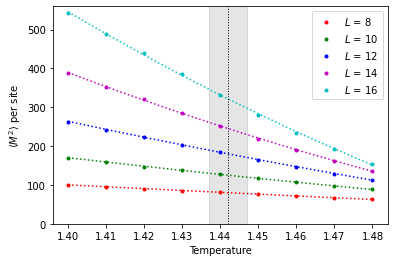

In [344]:
#Plot (Zoom)
plt.plot(T[20:29],M2pS8[20:29], "ro", xp,pM28(xp), "r:",
         T[20:29],M2pS10[20:29],"go", xp,pM210(xp),"g:",
         T[20:29],M2pS12[20:29],"bo", xp,pM212(xp),"b:",
         T[20:29],M2pS14[20:29],"mo", xp,pM214(xp),"m:",
         T[20:29],M2pS16[20:29],"co", xp,pM216(xp),"c:",markersize=3)
plt.ylabel(r'$\langle M^2 \rangle$ per site')
plt.xlabel('Temperature')
plt.legend([r'$L$ = 8', '_nolegend_',r"$L$ = 10",'_nolegend_',
            r"$L$ = 12",'_nolegend_',r"$L$ = 14",'_nolegend_',
            r"$L$ = 16" ])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [600,600],alpha=0.1,color="k")
plt.ylim(0,560)
plt.savefig('./Figures/Mag2PerSiteZoom.png', dpi=200, bbox_inches='tight')

In [360]:
M2_c = [pM28(xp[262]),pM210(xp[262]),pM212(xp[262]),pM214(xp[262]),pM216(xp[262])]

In [361]:
Log_M2 = np.array(np.log(M2_c))
modelM2 = sm.OLS(Log_M2,Log_lengths)
resultM2 = modelM2.fit()
resultM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.447e+05
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           7.44e-09
Time:                        01:55:57   Log-Likelihood:                 26.226
No. Observations:                   5   AIC:                            -48.45
Df Residuals:                       3   BIC:                            -49.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2116      0.007     28.510      0.000       0.188       0.235
x1             2.0056      0.003    666.831      0.000       1.996       2.015
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.729
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.726
Skew:                           0.446   Prob(JB):                        0.696
Kurtosis:                       1.361   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $\chi$

In [348]:
#χ square per site
χpS8  = D8[: ,7]/ 8**3
χpS10 = D10[:,7]/10**3
χpS12 = D12[:,7]/12**3
χpS14 = D14[:,7]/14**3
χpS16 = D16[:,7]/16**3

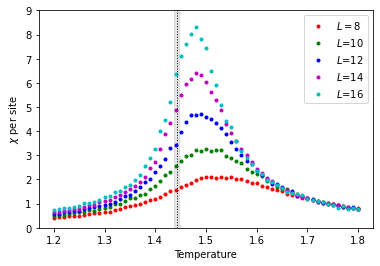

In [382]:
plt.plot(T,χpS8,"ro",
         T,χpS10,"go",
         T,χpS12,"bo",
         T,χpS14,"mo",
         T,χpS16,"co",markersize=3)
plt.ylabel(r'$\chi$ per site')
plt.xlabel('Temperature')
plt.legend([r'$L=8$',r"$L$=10",r"$L$=12",r"$L$=14",r"$L$=16"])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [9,9],alpha=0.1,color="k")
plt.ylim(0,9)
plt.savefig('./Figures/chiPer.png', dpi=200, bbox_inches='tight')

In [358]:
#Leats square polynomial fit of order 3 for points around the critical point
pχ8 = np.poly1d(np.polyfit(T[20:29], χpS8[20:29], 3))
pχ10 = np.poly1d(np.polyfit(T[20:29], χpS10[20:29], 3))
pχ12 = np.poly1d(np.polyfit(T[20:29], χpS12[20:29], 3))
pχ14 = np.poly1d(np.polyfit(T[20:29], χpS14[20:29], 3))
pχ16 = np.poly1d(np.polyfit(T[20:29], χpS16[20:29], 3))

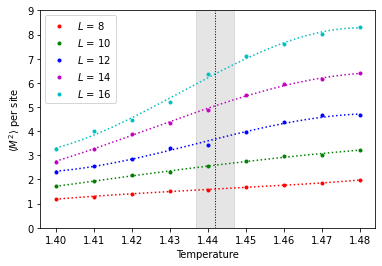

In [359]:
#Plot (Zoom)
plt.plot(T[20:29],χpS8[20:29], "ro", xp,pχ8(xp), "r:",
         T[20:29],χpS10[20:29],"go", xp,pχ10(xp),"g:",
         T[20:29],χpS12[20:29],"bo", xp,pχ12(xp),"b:",
         T[20:29],χpS14[20:29],"mo", xp,pχ14(xp),"m:",
         T[20:29],χpS16[20:29],"co", xp,pχ16(xp),"c:",markersize=3)
plt.ylabel(r'$\langle M^2 \rangle$ per site')
plt.xlabel('Temperature')
plt.legend([r'$L$ = 8', '_nolegend_',r"$L$ = 10",'_nolegend_',
            r"$L$ = 12",'_nolegend_',r"$L$ = 14",'_nolegend_',
            r"$L$ = 16" ])
plt.axvline(x = 1.442, color = 'k',ls=':', lw=1)
plt.fill_between([1.437,1.447], [600,600],alpha=0.1,color="k")
plt.ylim(0,9)
plt.savefig('./Figures/ChiPerSiteZoom.png', dpi=200, bbox_inches='tight')

In [363]:
χ_c = [pχ8(xp[262]),pχ10(xp[262]),pχ12(xp[262]),pχ14(xp[262]),pχ16(xp[262])]

In [364]:
LχcP = np.array(np.log(χ_c))
modelχcP = sm.OLS(LχcP,Log_lengths)
resultχcP = modelχcP.fit()
resultχcP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2782.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.50e-05
Time:                        01:57:26   Log-Likelihood:                 13.562
No. Observations:                   5   AIC:                            -23.12
Df Residuals:                       3   BIC:                            -23.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6650      0.093    -39.222      0.000      -3.962      -3.368
x1             1.9972      0.038     52.747      0.000       1.877       2.118
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.205
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.630
Skew:                          -0.158   Prob(JB):                        0.730
Kurtosis:                       1.289   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $\chi_{max}$

In [368]:
χ_max[0] /= 8**3
χ_max[1] /= 10**3
χ_max[2] /= 12**3
χ_max[3] /= 14**3
χ_max[4] /= 16**3

In [369]:
Lχmax = np.array(np.log(χ_max))
modelχmax = sm.OLS(Lχmax,Log_lengths)
resultχmax = modelχmax.fit()
resultχmax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.172e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           6.89e-07
Time:                        02:01:31   Log-Likelihood:                 18.848
No. Observations:                   5   AIC:                            -33.70
Df Residuals:                       3   BIC:                            -34.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2810      0.032   -101.064      0.000      -3.384      -3.178
x1             1.9389      0.013    147.390      0.000       1.897       1.981
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.771
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.435
Skew:                          -0.065   Prob(JB):                        0.804
Kurtosis:                       1.561   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

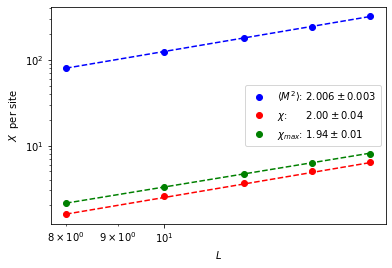

In [374]:
plt.plot(lengths,M2_c,"bo",lengths,np.exp(0.212)*np.power(lengths,2.006),"b--",
        lengths,χ_c,"ro",lengths,np.exp(-3.7)*np.power(lengths,2.00),"r--",
        lengths,χ_max,"go",lengths,np.exp(-3.28)*np.power(lengths,1.94),"g--")
plt.ylabel(r'$X$  per site')
plt.xlabel(r'$L$')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(.1,600)
plt.legend([r'$\langle M^2 \rangle$: $2.006\pm0.003$', '_nolegend_',
           r'$\chi$:      $2.00\pm0.04$', '_nolegend_',
           r'$\chi_{max}$: $1.94\pm0.01$'])
plt.savefig('./Figures/Gamma.png', dpi=200, bbox_inches='tight')

In [375]:
print(np.mean([2.006,2.00,1.94]))
print(np.std([2.006,2.00,1.94]))

1.982
0.029799328851502646


$\gamma/\nu=1.98\pm0.03$ $\textbf{vs}$ $1.97$

$\epsilon_\% = 2.0\%$

# G

In [427]:
γ_ν = 1.98
I_ν = 1.4
β_ν = 0.498
T_crit = 1.442

In [428]:
M8_s  = np.power(8,β_ν) *MpS8[:]
M10_s = np.power(10,β_ν)*MpS10[:]
M12_s = np.power(12,β_ν)*MpS12[:]
M14_s = np.power(14,β_ν)*MpS14[:]
M16_s = np.power(16,β_ν)*MpS16[:]

In [429]:
T8_s  = 8**I_ν *(T - T_crit)/T_crit
T10_s = 10**I_ν*(T - T_crit)/T_crit
T12_s = 12**I_ν*(T - T_crit)/T_crit
T14_s = 14**I_ν*(T - T_crit)/T_crit
T16_s = 16**I_ν*(T - T_crit)/T_crit

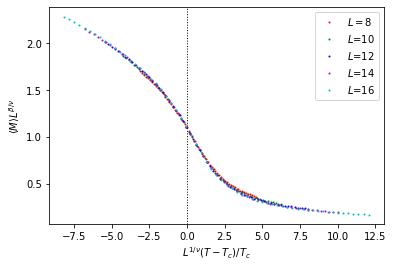

In [430]:
plt.plot(T8_s,M8_s,"ro",
        T10_s,M10_s,"go",
        T12_s,M12_s,"bo",
        T14_s,M14_s,"mo",
        T16_s,M16_s,"co",markersize = 1)
plt.ylabel(r'$\langle M \rangle L^{\beta/\nu}$')
plt.xlabel(r'$L^{1/\nu}(T-T_c)/T_c$')
plt.legend([r'$L=8$',r"$L$=10",r"$L$=12",r"$L$=14",r"$L$=16"])
plt.savefig('./Figures/Mscale.png', dpi=200, bbox_inches='tight')
plt.axvline(x = 0, color = 'k',ls=':', lw=1)

In [431]:
χ8_s  = np.power(8,-γ_ν) *χpS8[:]
χ10_s = np.power(10,-γ_ν)*χpS10[:]
χ12_s = np.power(12,-γ_ν)*χpS12[:]
χ14_s = np.power(14,-γ_ν)*χpS14[:]
χ16_s = np.power(16,-γ_ν)*χpS16[:]

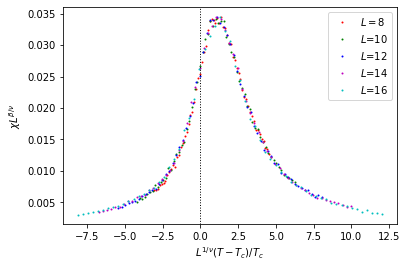

In [432]:
plt.plot(T8_s,χ8_s,"ro",
        T10_s,χ10_s,"go",
        T12_s,χ12_s,"bo",
        T14_s,χ14_s,"mo",
        T16_s,χ16_s,"co",markersize = 1)
plt.ylabel(r'$\chi L^{\beta/\nu}$')
plt.xlabel(r'$L^{1/\nu}(T-T_c)/T_c$')
plt.legend([r'$L=8$',r"$L$=10",r"$L$=12",r"$L$=14",r"$L$=16"])
plt.savefig('./Figures/Chiscale.png', dpi=200, bbox_inches='tight')
plt.axvline(x = 0, color = 'k',ls=':', lw=1)